<a href="https://colab.research.google.com/github/nrmalfn/css-exercises/blob/main/Ecommerce_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jawablah poin-poin assignment berikut
#### perhatikan dengan baik apa yang diminta pada soal

# 1. Anda bekerja sebagai seorang data scientist, atasan anda mengirimkan anda data kepada anda dan meminta untuk memberikan analisa dengan menggunakan :
- semua metode pada proses Exploratory Data Analysis. Lakukan proses Feature Engineering terlebih dahulu dan mengecek secara teliti pada tiap kolom data sembari melakukan data understanding. **(20 Poin)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing_assignment/assignment_EDA/ecommerce.csv')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     554697     21166           COOK WITH WINE METAL SIGN          1   
1     561038     82482    WOODEN PICTURE FRAME WHITE FINISH         2   
2     560552     23192  BUNDLE OF 3 ALPHABET EXERCISE BOOKS         1   
3     559884    85183B  CHARLIE & LOLA WASTEPAPER BIN FLORA        12   
4     544450     21789                   KIDS RAIN MAC PINK         3   

       InvoiceDate  UnitPrice  CustomerID         Country  
0  5/25/2011 17:31       2.08       14584  United Kingdom  
1  7/24/2011 11:58       2.55       17114  United Kingdom  
2  7/19/2011 12:54       1.65       15311  United Kingdom  
3  7/13/2011 11:34       1.25       16843  United Kingdom  
4  2/20/2011 12:23       0.85       17811  United Kingdom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


### Define the Column

| Nama Kolom               | Deskripsi                                |
|--------------------------|------------------------------------------|
|InvoiceNo                 |Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
|StockCode                 |Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
|Description               |Product (item) name. Nominal.
|Quantity                  |The quantities of each product (item) per transaction. Numeric.
|InvoiceDate               |Invice Date and time. Numeric, the day and time when each transaction was generated.
|UnitPrice                 |Unit price. Numeric, Product price per unit in sterling.
|CustomerID                |Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
|Country                   |Country name. Nominal, the name of the country where each customer resides.




### Missing Value Checking and Handling


In [ ]:
# Cek missing values
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
for col in df.columns:
  print(f"========== {col} ==========")
  print(df[col].value_counts())
  print()

  #Tidak ada missing values

========== InvoiceNo ==========
InvoiceNo
562046    8
575491    7
576339    7
578270    7
559552    6
570488    6
567656    6
554275    6
537137    5
571909    5
578068    5
570818    5
563924    5
568346    5
579516    5
579196    5
571039    5
553035    5
580727    5
570672    5
565766    5
553067    5
571653    4
569653    4
571883    4
576857    4
575152    4
580527    4
537144    4
537868    4
545530    4
576053    4
579446    4
574481    4
577504    4
572669    4
566495    4
562031    4
554098    4
560271    4
546851    4
544790    4
568066    4
566290    4
563076    4
556056    4
572741    4
574714    4
551531    4
580136    4
569803    4
578045    4
558237    4
545690    4
571046    4
544316    4
569669    4
544450    4
560444    4
567170    4
575607    4
577029    4
572103    4
572873    3
576212    3
558200    3
569894    3
539041    3
574258    3
556102    3
547372    3
549730    3
578088    3
546133    3
568050    3
544463    3
537135    3
568781    3
561025    3
537209    

### Duplicate Check and Handling

In [ ]:
# Cek data duplikat

len(df.drop_duplicates()) / len(df)

# Tidak ada duplikat

1.0

### Outlier Check and Handling


In [ ]:
# Cek Outliers
def check_outlier(df, variable):
  plt.figure(figsize=(15, 5))
  # Histogram
  plt.subplot(1, 3, 1)
  sns.histplot(df[variable], kde=True)
  plt.title(f"Histogram {variable}")
  # Boxplot
  plt.subplot(1, 3, 2)
  sns.boxplot(df[variable])
  plt.title(f"Boxplot {variable}")
  # Plot Q-Q
  plt.subplot(1, 3, 3)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.title(f"Probability Plot {variable}")

  plt.show()

In [ ]:
df.describe()

InvoiceNo     Quantity    UnitPrice    CustomerID
count    4870.000000  4870.000000  4870.000000   4870.000000
mean   560586.577413    12.945791     2.937057  15291.004312
std     13211.347819    38.145988     4.744515   1709.035002
min    536365.000000     1.000000     0.040000  12347.000000
25%    548861.000000     2.000000     1.250000  13975.000000
50%    561895.000000     5.000000     1.950000  15144.000000
75%    572126.000000    12.000000     3.750000  16793.250000
max    581585.000000   992.000000   145.000000  18283.000000

Melihat dari ringkasan statistik tersebut sepertinya terdapat outlier di kolom Quantity dan UnitPrice.

Perbandingan antara mean dan median Quantity cukup besar yakni mean = 12.9 dan median = 5.

Begitu pula dengan UnitPrice dengan mean = 2.9 dan median = 1.9, tidak sebesar Quantity perbedaannya. Namun jika dilihat dari range min-max nya sangatlah jauh dengan min = 0.04 hinggga max = 145

Oleh karena itu di sini saya coba tampilkan visualisasi data kedua kolom tersebut.

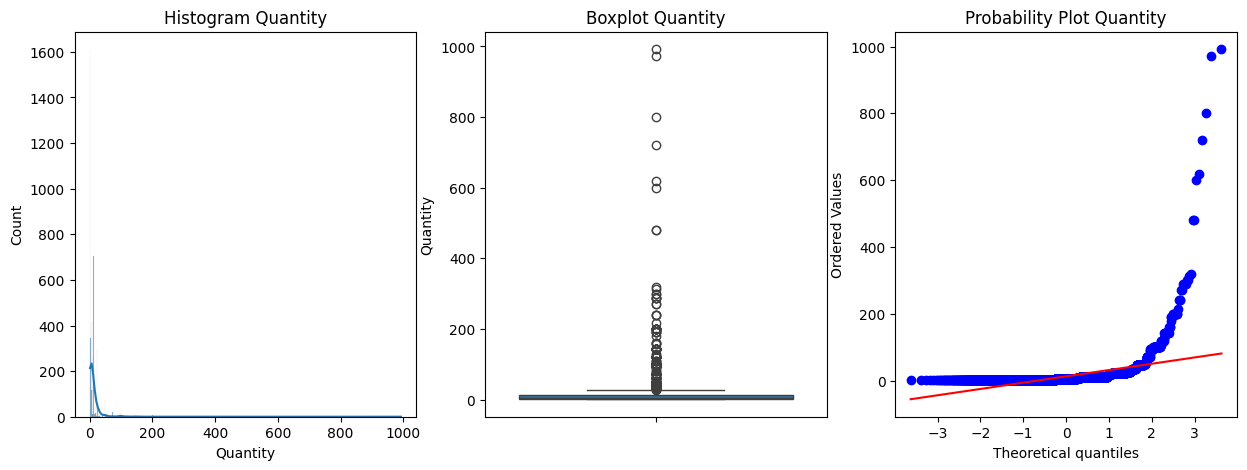

In [ ]:
check_outlier(df, 'Quantity')

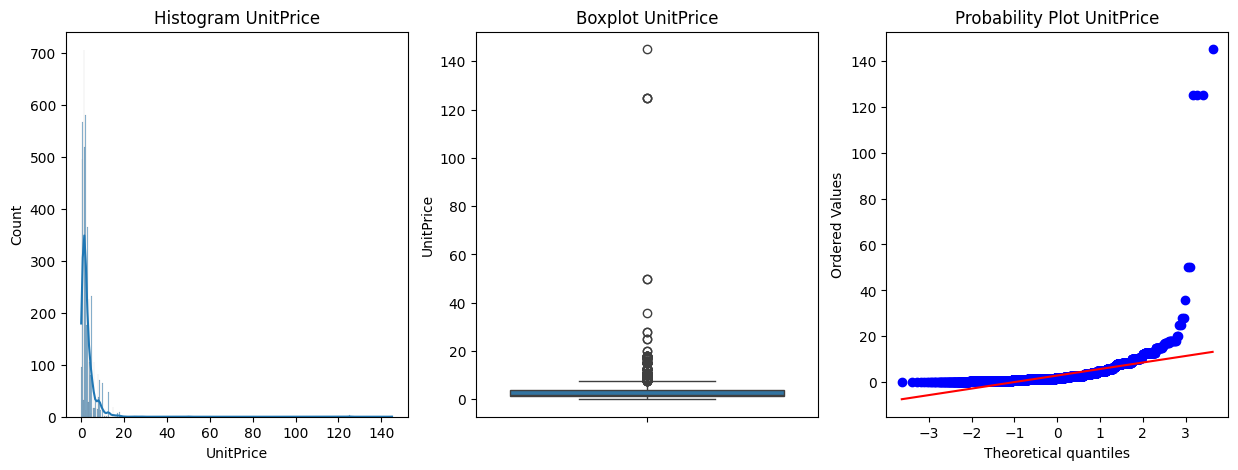

In [ ]:
check_outlier(df, 'UnitPrice')

In [ ]:
# Handling outliers
def find_outlier_index(df, variable):
  IQR= df[variable].quantile(0.75) - df[variable].quantile(0.25)
  lower_outlier_index = df[variable].quantile(0.25) - (1.5 * IQR)
  upper_outlier_index = df[variable].quantile(0.75) + (1.5 * IQR)
  return upper_outlier_index, lower_outlier_index

In [ ]:
quantity_upper_limit, quantity_lower_limit = find_outlier_index(df, 'Quantity')
quantity_upper_limit, quantity_lower_limit

(27.0, -13.0)

In [ ]:
df_quantity_outliers = df[(df['Quantity'] <= quantity_upper_limit) & (df['Quantity'] >= quantity_lower_limit)]

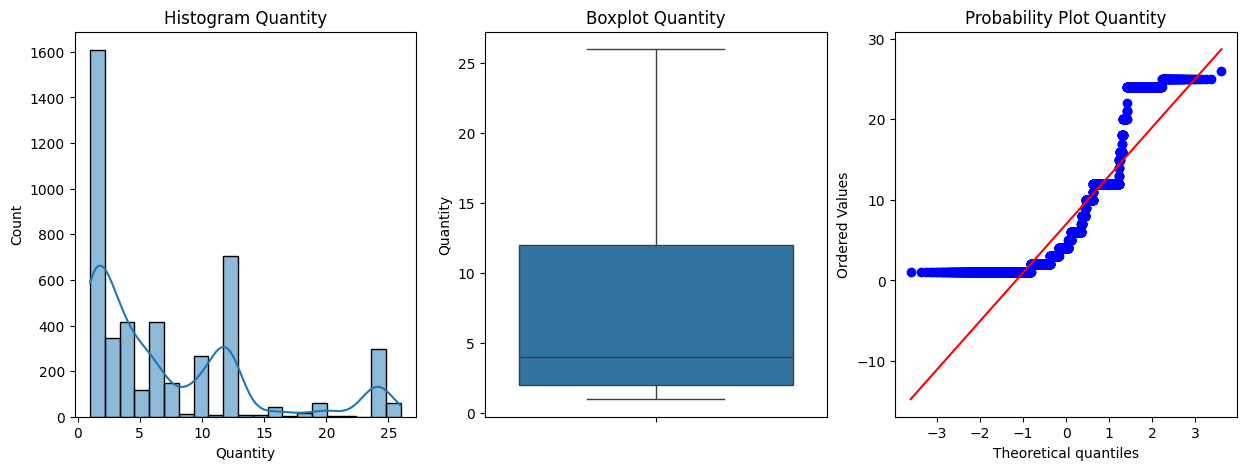

In [ ]:
check_outlier(df_quantity_outliers, 'Quantity')

In [ ]:
unitprc_upper_limit, unitprc_lower_limit = find_outlier_index(df, 'UnitPrice')
unitprc_upper_limit, unitprc_lower_limit

(7.5, -2.5)

In [ ]:
df_unitprc_outliers = df[(df['UnitPrice'] <= unitprc_upper_limit) & (df['UnitPrice'] >= unitprc_lower_limit)]

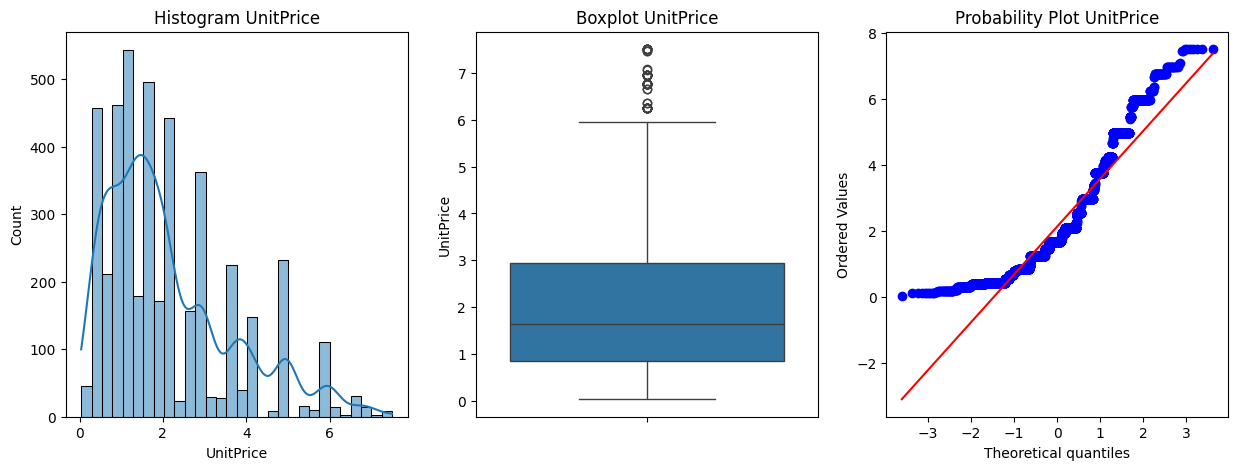

In [ ]:
check_outlier(df_unitprc_outliers, 'UnitPrice')

Setelah melakukan handling outliers sekarang mulai terlihat bahwa Quantity dan UnitPrice memiliki bentuk histogram yang Positively Skewed Distribution.

# 2. Setelah melakukan feature engineering, Ikuti anjuran berikut :
- Buat 5 pertanyaan analisa
- jawab dengan pendekatan metode data manipulation (sorting, filtering, group by, pivot, melt, crosstab, working with datetime, dsb (sesuaikan dengan keperluan anda
- Buatlah visualisasi grafik supaya mempermudah dalam ekstraksi insight setelah menjawab menggunakan metode data manipulation diatas
- Tulis insight anda

`poin` :
- insight / observation : **10 poin (1 pertanyaan 2 poin)**
- pertanyaan analisis dan jawaban metode data manipulation : **30 poin (1 pertanyaan 7 poin)**
- data visualisasi : **30 poin (1 visualisasi dari 1 pertanyaan 7 poin)**

```Analysis Question```
1. Apa saja produk yang kuantitas penjualannya melebihi rata-rata?
2. Produk apa yang memiliki total penjualan tertinggi?
3. Bagaimana total penjualan setiap produk di setiap negara?
4. Kapan waktu penjualan tertinggi dalam sehari?
5. Negara mana yang memiliki total penjualan di atas rata-rata?

### 1. Apa saja produk yang kuantitas penjualannya melebihi rata-rata? (Filtering)

In [ ]:
df['Quantity'].mean()

12.945790554414785

In [ ]:
df_filtered = df[df['Quantity'] >= df['Quantity'].mean()]
df_filtered

InvoiceNo StockCode                          Description  Quantity  \
13       580727     22460       EMBOSSED GLASS TEALIGHT HOLDER        13   
17       569640     23197    SKETCHBOOK MAGNETIC SHOPPING LIST        36   
21       543631     21500                  PINK POLKADOT WRAP         25   
29       561875     23311          VINTAGE CHRISTMAS STOCKING         24   
34       568062     85015      SET OF 12  VINTAGE POSTCARD SET        24   
36       543354     21916      SET 12 RETRO WHITE CHALK STICKS        24   
42       577772     21210   SET OF 72 RETROSPOT PAPER  DOILIES        24   
56       537236     21531         RED RETROSPOT SUGAR JAM BOWL        24   
62       574719     21136         PAINTED METAL PEARS ASSORTED        16   
64       547716     22084               PAPER CHAIN KIT EMPIRE        15   
67       562393     23154             SET OF 4 JAM JAR MAGNETS        24   
73       566987     22556       PLASTERS IN TIN CIRCUS PARADE         36   
89       577857     21822    GLITTER CHRISTMAS TREE WITH BELLS        36   
92       560547     47566                        PARTY BUNTING        16   
96       578140    47591D      PINK FAIRY CAKE CHILDRENS APRON        50   
99       578517     22578   WOODEN STAR CHRISTMAS SCANDINAVIAN        48   
106      540455     21883                     STARS GIFT TAPE        144   
108      570522     21931               JUMBO STORAGE BAG SUKI       100   
117      539106     22966        GINGERBREAD MAN COOKIE CUTTER       144   
134      554597     84978     HANGING HEART JAR T-LIGHT HOLDER        24   
137      565181     22659              LUNCH BOX I LOVE LONDON       192   
139      561170     22492              MINI PAINT SET VINTAGE         36   
140      566781     22816                 CARD MOTORBIKE SANTA        24   
149      537204     21802      CHRISTMAS TREE HEART DECORATION        15   
154      575213     22041         RECORD FRAME 7" SINGLE SIZE         48   
157      555719     21395                BLUE POLKADOT BEAKER         48   
161      559354     22710                  WRAP I LOVE LONDON         25   
164      558994     47566                        PARTY BUNTING        50   
177      539338     22949                36 DOILIES DOLLY GIRL       144   
181      540176     22382           LUNCH BAG SPACEBOY DESIGN        100   
184      565249     23005     TRAVEL CARD WALLET I LOVE LONDON        24   
185      576595    85123A   WHITE HANGING HEART T-LIGHT HOLDER        96   
192      548211     21209            MULTICOLOUR HONEYCOMB FAN        48   
193      560048    16161P                   WRAP ENGLISH ROSE         25   
195      566648     22741                       FUNKY DIVA PEN        48   
197      559058     22644       CERAMIC CHERRY CAKE MONEY BANK        24   
201      545295     22567              20 DOLLY PEGS RETROSPOT        20   
203      544309     79000                   MOROCCAN TEA GLASS        24   
207      540040     22467                    GUMBALL COAT RACK        36   
212      548320     21452                  TOADSTOOL MONEY BOX        20   
221      569721     11001          ASSTD DESIGN RACING CAR PEN        16   
223      536783     16237                 SLEEPING CAT ERASERS       270   
242      543008     22621           TRADITIONAL KNITTING NANCY        96   
256      547223     17021               NAMASTE SWAGAT INCENSE        18   
258      554483    85123A   WHITE HANGING HEART T-LIGHT HOLDER        18   
259      544644     21313          GLASS HEART T-LIGHT HOLDER         24   
274      566495     23436    VINTAGE CHRISTMAS GIFT BAG LARGE         20   
277      553927     21878  PACK OF 6 SANDCASTLE FLAGS ASSORTED       200   
279      570983     23366       SET 12 COLOURING PENCILS DOILY        24   
289      539041    17012E    ORIGAMI OPIUM INCENSE/CANDLE SET         24   
291      575751     21677                     HEARTS  STICKERS        24   
310      550025     22698       PINK REGENCY TEACUP AN

In [ ]:
product_quantity = df_filtered['Description'].value_counts().sort_values(ascending=False).head(5).reset_index()
product_quantity

Description  count
0         60 TEATIME FAIRY CAKE CASES     10
1             JUMBO BAG RED RETROSPOT      8
2  WHITE HANGING HEART T-LIGHT HOLDER      7
3                      POPCORN HOLDER      6
4       ASSORTED COLOUR BIRD ORNAMENT      6

<ipython-input-22-6737dbc58ca1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='count', data=product_quantity, palette='viridis')


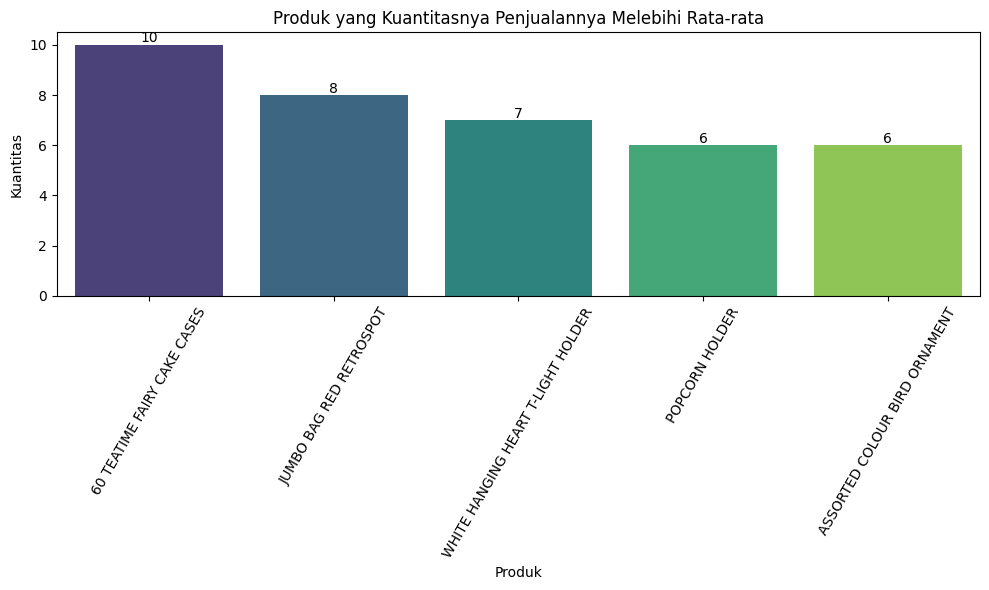

In [ ]:
# Visualisasi data

plt.figure(figsize=(10, 6))
sns.barplot(x='Description', y='count', data=product_quantity, palette='viridis')
for i, count in enumerate(product_quantity['count']):
  plt.text(i, count + 0.1, str(count), ha='center',
           fontsize=10, color='black')
plt.title('Produk yang Kuantitasnya Penjualannya Melebihi Rata-rata')
plt.xlabel('Produk')
plt.ylabel('Kuantitas')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

#### Observation and Insight

Lima produk dengan kuantitas pembelian terbanyak adalah:
1. 60 TEATIME FAIRY CAKE CASES
2. JUMBO BAG RED RETROSPOT
3. WHITE HANGING HEART T-LIGHT HOLDER
4. POPCORN HOLDER
5. ASSORTED COLOUR BIRD ORNAMENT

Data ini bisa digunakan untuk menentukan penambahan stok opname produk yang banyak terjual dan melakukan strategi pemasaran seperti promo bundling untuk produk yang biasanya dibeli dalam jumlah banyak dalam sekali pembelian


### 2. Produk apa yang memiliki total penjualan tertinggi? (Groupby)

In [ ]:
# Menghitung total penjualan terlebih dahulu (Quantity*UnitPrice)

def hitung_total_penjualan(df):
  df['TotalPenjualan'] = df_quantity_outliers['Quantity'] * df_unitprc_outliers['UnitPrice']
  return df

for col in ['Quantity', 'UnitPrice']:
  df[col] = df[col].astype('float')

df = hitung_total_penjualan(df)

df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     554697     21166           COOK WITH WINE METAL SIGN        1.0   
1     561038     82482    WOODEN PICTURE FRAME WHITE FINISH       2.0   
2     560552     23192  BUNDLE OF 3 ALPHABET EXERCISE BOOKS       1.0   
3     559884    85183B  CHARLIE & LOLA WASTEPAPER BIN FLORA      12.0   
4     544450     21789                   KIDS RAIN MAC PINK       3.0   

       InvoiceDate  UnitPrice  CustomerID         Country  TotalPenjualan  
0  5/25/2011 17:31       2.08       14584  United Kingdom            2.08  
1  7/24/2011 11:58       2.55       17114  United Kingdom            5.10  
2  7/19/2011 12:54       1.65       15311  United Kingdom            1.65  
3  7/13/2011 11:34       1.25       16843  United Kingdom           15.00  
4  2/20/2011 12:23       0.85       17811  United Kingdom            2.55

In [ ]:
#Groupby Produk dan Total Penjualannya

df_grouped = df.groupby('Description')['TotalPenjualan'].sum().reset_index()
df_grouped.head()

Description  TotalPenjualan
0     50'S CHRISTMAS GIFT BAG LARGE           30.00
1                 DOLLY GIRL BEAKER            3.75
2       I LOVE LONDON MINI BACKPACK           33.20
3           RED SPOT GIFT BAG LARGE           15.00
4   SET 2 TEA TOWELS I LOVE LONDON            18.00

In [ ]:
penjualan_tertinggi = df_grouped.sort_values(by='TotalPenjualan', ascending=False).head(5)
penjualan_tertinggi

Description  TotalPenjualan
1060                       PARTY BUNTING          648.45
1385   SET OF 3 CAKE TINS PANTRY DESIGN           427.40
321                        CHILLI LIGHTS          355.60
1724  WHITE HANGING HEART T-LIGHT HOLDER          315.65
1545                      SPOTTY BUNTING          306.90

<ipython-input-26-c1c92da31be3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='TotalPenjualan', data=penjualan_tertinggi, palette='deep')


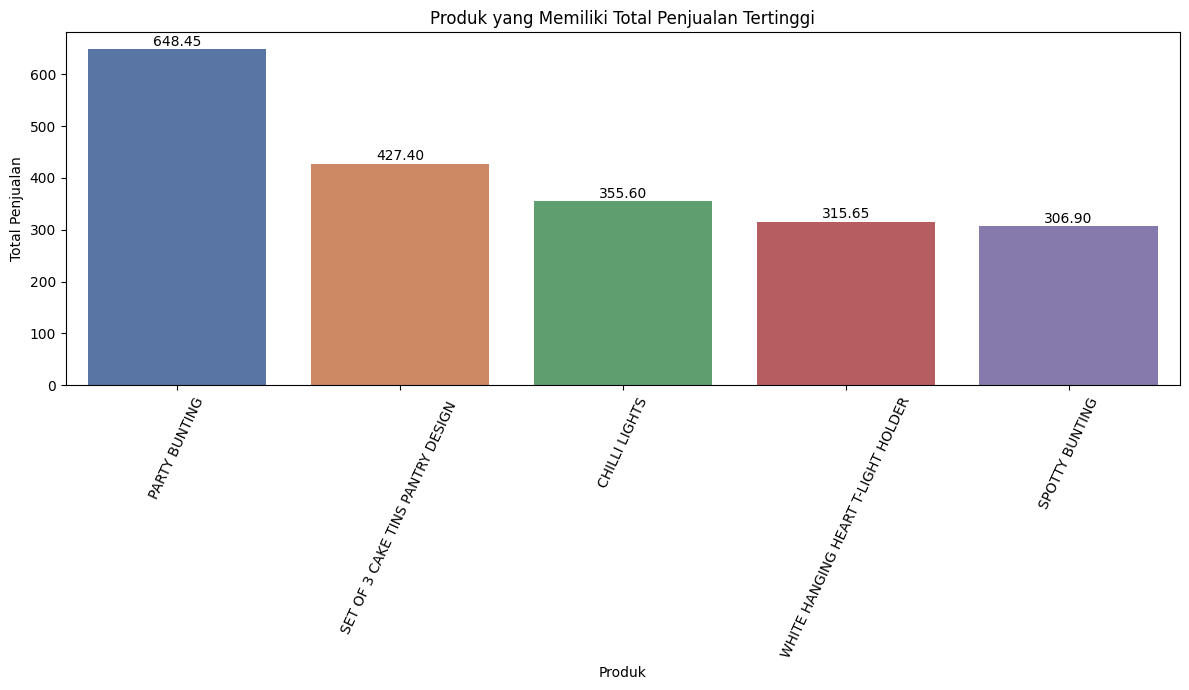

In [ ]:
# Visualisasi data

plt.figure(figsize=(12, 7))
sns.barplot(x='Description', y='TotalPenjualan', data=penjualan_tertinggi, palette='deep')

for i, count in enumerate(penjualan_tertinggi['TotalPenjualan']):
  plt.text(i, count + (0.01 * df_grouped['TotalPenjualan'].max()), f"{count:,.2f}",
            ha='center', fontsize=10, color='black')

plt.title('Produk yang Memiliki Total Penjualan Tertinggi')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

#### Observation and Insight

Produk yang memiliki total penjualan tertinggi adalah WHITE HANGING HEART T-LIGHT HOLDER


### 3. Bagaimana total penjualan setiap produk di setiap negara? (Pivoting, Missing Value handling, Melt)

In [ ]:
tabel_pivot = pd.pivot_table(df, values='TotalPenjualan', index='Description', columns='Country', aggfunc='sum').reset_index()
tabel_pivot

Country                          Description  Australia  Austria  Belgium  \
0              50'S CHRISTMAS GIFT BAG LARGE        NaN      NaN      NaN   
1                          DOLLY GIRL BEAKER        NaN      NaN      NaN   
2                I LOVE LONDON MINI BACKPACK      16.60      NaN      NaN   
3                    RED SPOT GIFT BAG LARGE        NaN      NaN      NaN   
4            SET 2 TEA TOWELS I LOVE LONDON         NaN      NaN      NaN   
5                     SPACEBOY BABY GIFT SET        NaN      NaN      NaN   
6                          TRELLIS COAT RACK        NaN      NaN      NaN   
7                     10 COLOUR SPACEBOY PEN        NaN      NaN      NaN   
8                 12 COLOURED PARTY BALLOONS        NaN      NaN      NaN   
9                  12 EGG HOUSE PAINTED WOOD        NaN      NaN      NaN   
10           12 MESSAGE CARDS WITH ENVELOPES        NaN      NaN      NaN   
11             12 PENCIL SMALL TUBE WOODLAND        NaN      NaN      NaN   
12       12 PENCILS SMALL TUBE RED RETROSPOT        NaN      NaN      NaN   
13               12 PENCILS SMALL TUBE SKULL        NaN      NaN      NaN   
14                 12 PENCILS TALL TUBE POSY        NaN      NaN      NaN   
15        12 PENCILS TALL TUBE RED RETROSPOT        NaN      NaN      NaN   
16               12 PENCILS TALL TUBE SKULLS        NaN      NaN      NaN   
17             12 PENCILS TALL TUBE WOODLAND        NaN      NaN      NaN   
18            12 RED ROSE PEG PLACE SETTINGS        NaN      NaN      NaN   
19       15CM CHRISTMAS GLASS BALL 20 LIGHTS        NaN      NaN      NaN   
20        16 PIECE CUTLERY SET PANTRY DESIGN        NaN      NaN      NaN   
21          2 PICTURE BOOK EGGS EASTER DUCKS        NaN      NaN      NaN   
22                   20 DOLLY PEGS RETROSPOT        NaN      NaN      NaN   
23       3 DRAWER ANTIQUE WHITE WOOD CABINET        NaN      NaN      NaN   
24           3 GARDENIA MORRIS BOXED CANDLES        NaN      NaN      NaN   
25        3 HEARTS HANGING DECORATION RUSTIC        NaN      NaN      NaN   
26                3 HOOK HANGER MAGIC GARDEN        NaN      NaN      NaN   
27          3 HOOK PHOTO SHELF ANTIQUE WHITE        NaN      NaN      NaN   
28        3 PIECE SPACEBOY COOKIE CUTTER SET        NaN      NaN      NaN   
29          3 RAFFIA RIBBONS 50'S CHRISTMAS         NaN      NaN      NaN   
30               3 ROSE MORRIS BOXED CANDLES        NaN      NaN      NaN   
31                  3 STRIPEY MICE FELTCRAFT        NaN      NaN      NaN   
32           3 TIER CAKE TIN GREEN AND CREAM        NaN      NaN      NaN   
33             3 TIER CAKE TIN RED AND CREAM        NaN      NaN      NaN   
34            3 TIER SWEETHEART GARDEN SHELF        NaN      NaN      NaN   
35        3 TRADITIONAl BISCUIT CUTTERS  SET        NaN      NaN      NaN   
36                     36 DOILIES DOLLY GIRL        NaN      NaN      NaN   
37              36 DOILIES VINTAGE CHRISTMAS        NaN      NaN      NaN   
38                  36 FOIL HEART CAKE CASES        NaN      NaN      NaN   
39                  36 FOIL STAR CAKE CASES         NaN      NaN      NaN   
40             36 PENCILS TUBE RED RETROSPOT        NaN      NaN      NaN   
41                    36 PENCILS TUBE SKULLS        NaN      NaN      NaN   
42                  36 PENCILS TUBE WOODLAND        NaN      NaN      NaN   
43             3D CHRISTMAS STAMPS STICKERS         NaN      NaN      NaN   
44              3D DOG PICTURE PLAYING CARDS        NaN      NaN      NaN   
45        3D HEARTS  HONEYCOMB PAPER GARLAND        NaN      NaN      NaN   
46                  3D SHEET OF CAT STICKERS        NaN      NaN      NaN   
47         3D TRADITIONAL CHRISTMAS STICKERS        NaN      NaN      NaN   
48            3D VINTAGE CHRISTMAS STICKERS         NaN      NaN      NaN   
49       4 IVORY DINNER CANDLES SILVER FLOCK        NaN      NaN      NaN   
50       4 LAVENDER BOTANICAL DINNER CANDLES        NaN      NaN      NaN

In [ ]:
tabel_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Description           1807 non-null   object 
 1   Australia             13 non-null     float64
 2   Austria               7 non-null      float64
 3   Belgium               20 non-null     float64
 4   Brazil                1 non-null      float64
 5   Canada                2 non-null      float64
 6   Channel Islands       8 non-null      float64
 7   Cyprus                6 non-null      float64
 8   Denmark               4 non-null      float64
 9   EIRE                  81 non-null     float64
 10  Finland               7 non-null      float64
 11  France                77 non-null     float64
 12  Germany               111 non-null    float64
 13  Greece                7 non-null      float64
 14  Iceland               1 non-null      float64
 15  Israel               

In [ ]:
print(tabel_pivot.isna().sum())

Country
Description                0
Australia               1794
Austria                 1800
Belgium                 1787
Brazil                  1806
Canada                  1805
Channel Islands         1799
Cyprus                  1801
Denmark                 1803
EIRE                    1726
Finland                 1800
France                  1730
Germany                 1696
Greece                  1800
Iceland                 1806
Israel                  1805
Italy                   1802
Japan                   1802
Lebanon                 1806
Malta                   1806
Netherlands             1781
Norway                  1793
Poland                  1805
Portugal                1792
RSA                     1806
Singapore               1804
Spain                   1782
Sweden                  1795
Switzerland             1780
United Arab Emirates    1805
United Kingdom            79
Unspecified             1803
dtype: int64


In [ ]:
total_rows = len(tabel_pivot)

for column in tabel_pivot.columns:
  total_null = tabel_pivot[column].isna().sum()
  percentage_null = (total_null / total_rows) * 100
  print(f"Column: {column}, Total Null: {total_null}, Percentage Null: {percentage_null:.2f}%")

Column: Description, Total Null: 0, Percentage Null: 0.00%
Column: Australia, Total Null: 1794, Percentage Null: 99.28%
Column: Austria, Total Null: 1800, Percentage Null: 99.61%
Column: Belgium, Total Null: 1787, Percentage Null: 98.89%
Column: Brazil, Total Null: 1806, Percentage Null: 99.94%
Column: Canada, Total Null: 1805, Percentage Null: 99.89%
Column: Channel Islands, Total Null: 1799, Percentage Null: 99.56%
Column: Cyprus, Total Null: 1801, Percentage Null: 99.67%
Column: Denmark, Total Null: 1803, Percentage Null: 99.78%
Column: EIRE, Total Null: 1726, Percentage Null: 95.52%
Column: Finland, Total Null: 1800, Percentage Null: 99.61%
Column: France, Total Null: 1730, Percentage Null: 95.74%
Column: Germany, Total Null: 1696, Percentage Null: 93.86%
Column: Greece, Total Null: 1800, Percentage Null: 99.61%
Column: Iceland, Total Null: 1806, Percentage Null: 99.94%
Column: Israel, Total Null: 1805, Percentage Null: 99.89%
Column: Italy, Total Null: 1802, Percentage Null: 99.72

```Observation```

- Selain UK missing valuesnya berada di
atas 20%. Oleh karena itu saya akan drop semua kolom selain UK dan menghandle Missing Value di Kolom UK.

- Dari sini bisa saya katakan pusat penjualan pada data ini berada di UK, namun bisa saja terdapat *International Shipment* sehingga beberapa negara bisa membeli produk dari perusahaan ini.

Oleh karena itu, saya akan menambahkan pertanyaan turunan dari pertanyaan nomor 3 ini. **Apa saja produk yang memiliki total penjualan tertinggi di UK?**

In [ ]:
threshold = 0.2 * len(tabel_pivot)
tabel_pivot.dropna(axis=1, thresh=threshold, inplace=True)
tabel_pivot.sample(5)

Country                         Description  United Kingdom
1370          SET OF 16 VINTAGE RED CUTLERY            0.00
179        BLUE GLASS CHUNKY CHARM BRACELET            0.00
130      BAKING MOULD HEART WHITE CHOCOLATE           40.80
994       PACK OF 12 50'S CHRISTMAS TISSUES            0.39
564        FOLKART ZINC HEART CHRISTMAS DEC           10.20

In [ ]:
tabel_long = (tabel_pivot.melt(id_vars='Description',
                               var_name='Country',
                               value_name='TotalPenjualan'))
tabel_long = tabel_long.sort_values(by='TotalPenjualan', ascending=False)
tabel_long.head()

Description         Country  TotalPenjualan
1060                      PARTY BUNTING  United Kingdom          569.25
1385  SET OF 3 CAKE TINS PANTRY DESIGN   United Kingdom          368.00
321                       CHILLI LIGHTS  United Kingdom          332.60
1545                     SPOTTY BUNTING  United Kingdom          306.90
1753        WOODEN FRAME ANTIQUE WHITE   United Kingdom          273.60

In [ ]:
sales_by_product = tabel_long.groupby('Description')['TotalPenjualan'].sum().reset_index()
sales_by_product.head()

Description  TotalPenjualan
0     50'S CHRISTMAS GIFT BAG LARGE           30.00
1                 DOLLY GIRL BEAKER            3.75
2       I LOVE LONDON MINI BACKPACK           16.60
3           RED SPOT GIFT BAG LARGE           15.00
4   SET 2 TEA TOWELS I LOVE LONDON            18.00

In [ ]:
total_sales_uk = sales_by_product['TotalPenjualan'].sum()

In [ ]:
sales_by_product['Percentage']= (sales_by_product['TotalPenjualan'] / total_sales_uk) * 100

```Alasan memilih hanya 5 produk dengan penjualan tertinggi yang divisualisasikan```

- Persentase kelima produk dengan penjualan tertinggi bahkan tidak mencapai 5 persen, maka dari itu visualisasi datanya tidak akan bagus jika semua produk ditampilkan.


In [ ]:
top5_product = sales_by_product.sort_values(by='TotalPenjualan', ascending=False).head()
top5_product['Percentage'] = (top5_product['TotalPenjualan']/total_sales_uk) * 100
top5_product

Description  TotalPenjualan  Percentage
1060                      PARTY BUNTING          569.25    1.267425
1385  SET OF 3 CAKE TINS PANTRY DESIGN           368.00    0.819346
321                       CHILLI LIGHTS          332.60    0.740528
1545                     SPOTTY BUNTING          306.90    0.683308
1753        WOODEN FRAME ANTIQUE WHITE           273.60    0.609166

<ipython-input-37-e10a825e3b91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='Percentage', data=top5_product, palette='deep')


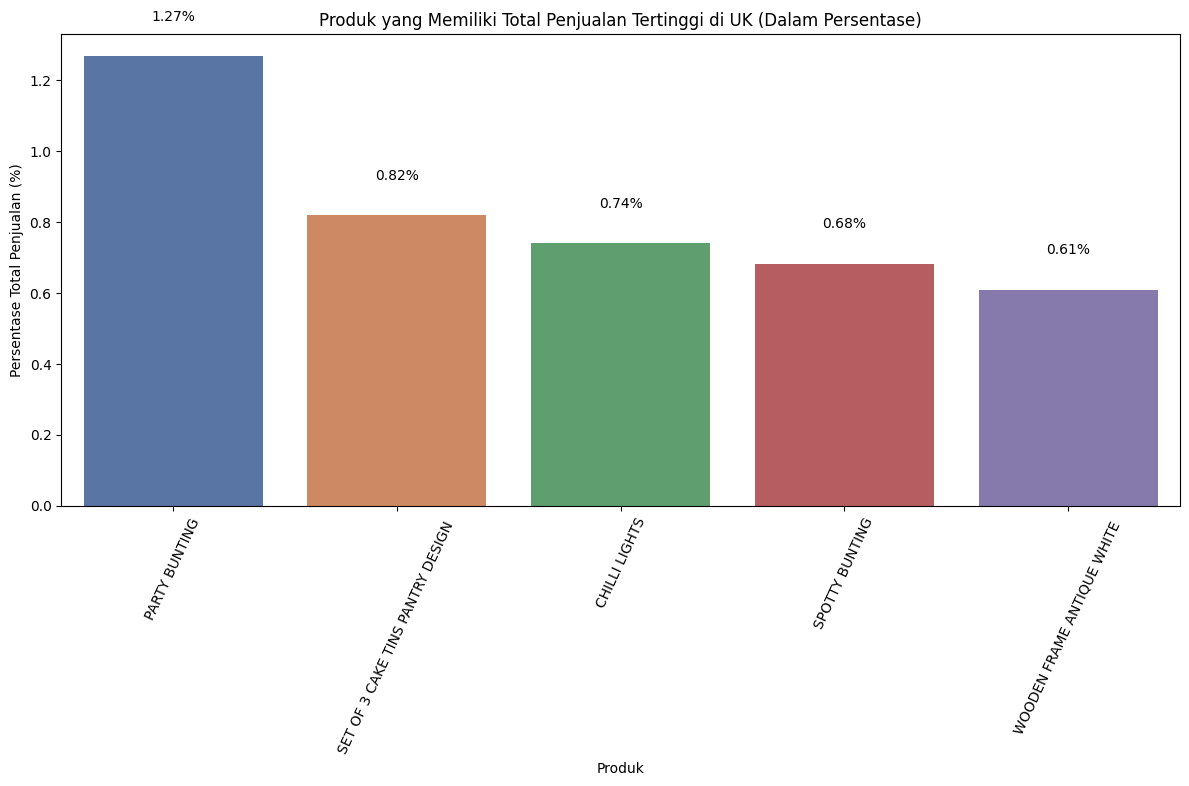

In [ ]:
# Visualisasi data 5 penjualan tertinggi
plt.figure(figsize=(12, 8))
sns.barplot(x='Description', y='Percentage', data=top5_product, palette='deep')

for i, percentage in enumerate(top5_product['Percentage']):
    plt.text(i, percentage + 0.1, f"{percentage:.2f}%", ha='center', fontsize=10, color='black')

plt.title('Produk yang Memiliki Total Penjualan Tertinggi di UK (Dalam Persentase)')
plt.xlabel('Produk')
plt.ylabel('Persentase Total Penjualan (%)')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()


#### Observation & Insight

- Seperti yang sudah saya sebutkan sebelumnya persentase total penjualan produk tebanyak tidak mencapai 5% (3.9%) menunjukkan produk yang terjual di UK sangat bervariasi dan penjualan setiap produknya cukup merata.
- 5 produk dengan penjualan tertinggi di UK sama dengan 5 produk dengan penjualan tertinggi dari seluruh dataframe ini, hal ini sekali lagi menunjukkan bahwa penjualan perusahaan ini terpusat di UK.

### 4. Kapan waktu penjualan tertinggi dalam setahun?

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPenjualan'],
      dtype='object')

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     554697     21166           COOK WITH WINE METAL SIGN        1.0   
1     561038     82482    WOODEN PICTURE FRAME WHITE FINISH       2.0   
2     560552     23192  BUNDLE OF 3 ALPHABET EXERCISE BOOKS       1.0   
3     559884    85183B  CHARLIE & LOLA WASTEPAPER BIN FLORA      12.0   
4     544450     21789                   KIDS RAIN MAC PINK       3.0   

       InvoiceDate  UnitPrice  CustomerID         Country  TotalPenjualan  
0  5/25/2011 17:31       2.08       14584  United Kingdom            2.08  
1  7/24/2011 11:58       2.55       17114  United Kingdom            5.10  
2  7/19/2011 12:54       1.65       15311  United Kingdom            1.65  
3  7/13/2011 11:34       1.25       16843  United Kingdom           15.00  
4  2/20/2011 12:23       0.85       17811  United Kingdom            2.55

In [ ]:
# Ubah jadi datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   InvoiceNo       4870 non-null   int64         
 1   StockCode       4870 non-null   object        
 2   Description     4870 non-null   object        
 3   Quantity        4870 non-null   float64       
 4   InvoiceDate     4870 non-null   datetime64[ns]
 5   UnitPrice       4870 non-null   float64       
 6   CustomerID      4870 non-null   int64         
 7   Country         4870 non-null   object        
 8   TotalPenjualan  4144 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 342.5+ KB


In [ ]:
# Memastikan sudah berubah

df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     554697     21166           COOK WITH WINE METAL SIGN        1.0   
1     561038     82482    WOODEN PICTURE FRAME WHITE FINISH       2.0   
2     560552     23192  BUNDLE OF 3 ALPHABET EXERCISE BOOKS       1.0   
3     559884    85183B  CHARLIE & LOLA WASTEPAPER BIN FLORA      12.0   
4     544450     21789                   KIDS RAIN MAC PINK       3.0   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPenjualan  
0 2011-05-25 17:31:00       2.08       14584  United Kingdom            2.08  
1 2011-07-24 11:58:00       2.55       17114  United Kingdom            5.10  
2 2011-07-19 12:54:00       1.65       15311  United Kingdom            1.65  
3 2011-07-13 11:34:00       1.25       16843  United Kingdom           15.00  
4 2011-02-20 12:23:00       0.85       17811  United Kingdom            2.55

In [ ]:
# Menambahkan kolom bulan penjualan

df['MonthofSales'] = df['InvoiceDate'].dt.month_name()
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     554697     21166           COOK WITH WINE METAL SIGN        1.0   
1     561038     82482    WOODEN PICTURE FRAME WHITE FINISH       2.0   
2     560552     23192  BUNDLE OF 3 ALPHABET EXERCISE BOOKS       1.0   
3     559884    85183B  CHARLIE & LOLA WASTEPAPER BIN FLORA      12.0   
4     544450     21789                   KIDS RAIN MAC PINK       3.0   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPenjualan  \
0 2011-05-25 17:31:00       2.08       14584  United Kingdom            2.08   
1 2011-07-24 11:58:00       2.55       17114  United Kingdom            5.10   
2 2011-07-19 12:54:00       1.65       15311  United Kingdom            1.65   
3 2011-07-13 11:34:00       1.25       16843  United Kingdom           15.00   
4 2011-02-20 12:23:00       0.85       17811  United Kingdom            2.55   

  MonthofSales  
0          May  
1         July  
2         July  
3         July  
4     February

In [ ]:
# Menghitung rata-rata penjualan perbulan

df.groupby('MonthofSales')['TotalPenjualan'].mean()

MonthofSales
April        14.185746
August       14.422634
December     12.172151
February     13.221111
January      13.604667
July         14.561522
June         12.525102
March        13.225089
May          14.014490
November     11.020246
October      11.236265
September    12.116468
Name: TotalPenjualan, dtype: float64

In [ ]:
# Mngurutkan nama bulan

month_order = ['January', 'February', 'March', 'April',
               'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']
df['MonthofSales'] = pd.Categorical(df['MonthofSales'], categories=month_order, ordered=True)

In [ ]:
# Membuat groupby dan reset index untuk visualisasi

mean_of_sales = df.groupby('MonthofSales')['TotalPenjualan'].mean().reset_index().sort_values(by='MonthofSales')
mean_of_sales

<ipython-input-45-443c19f0847a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_of_sales = df.groupby('MonthofSales')['TotalPenjualan'].mean().reset_index().sort_values(by='MonthofSales')


MonthofSales  TotalPenjualan
0       January       13.604667
1      February       13.221111
2         March       13.225089
3         April       14.185746
4           May       14.014490
5          June       12.525102
6          July       14.561522
7        August       14.422634
8     September       12.116468
9       October       11.236265
10     November       11.020246
11     December       12.172151

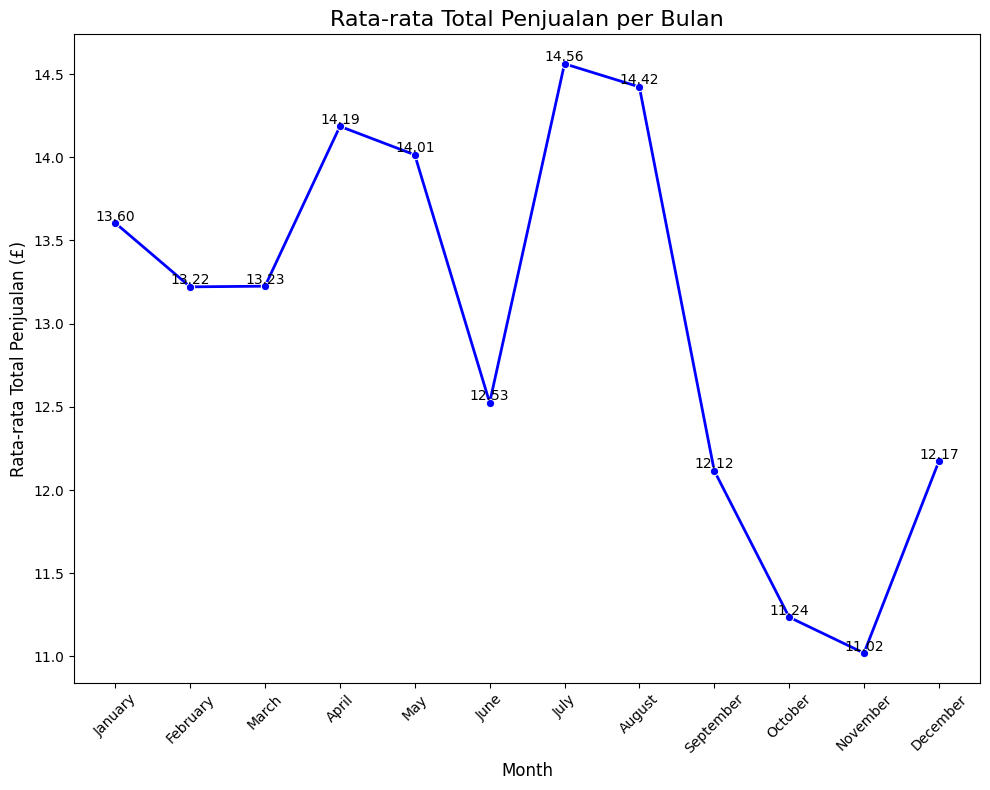

In [ ]:
# Visualisasi data linechart
plt.figure(figsize=(10, 8))
sns.lineplot(data=mean_of_sales, x='MonthofSales', y='TotalPenjualan', marker='o', color='blue', linewidth=2)

for i, total in enumerate(mean_of_sales['TotalPenjualan']):
    plt.text(i, total + (0.001 * (mean_of_sales['TotalPenjualan']).max()), f"{total:,.2f}",
             ha='center', fontsize=10, color='black')

plt.title("Rata-rata Total Penjualan per Bulan", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Rata-rata Total Penjualan (£)", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Observation & Insight

- Penjualan selama tahun 2011 memiliki tren yang cenderung menurun.
- Penjualan tertinggi terjadi di bulan July dan menurun di bulan-bulan selanjutnya, baru mulai naik lagi di Desember.

### 5. Sebanyak apa total kuantitas produk yang dibeli setiap negara?


In [ ]:
crosstab_quantity_per_country = pd.crosstab(index=df['Country'], columns='Total Quantity Sold', values=df['Quantity'], aggfunc='sum').fillna(0)
crosstab_quantity_per_country = crosstab_quantity_per_country.reset_index()
crosstab_quantity_per_country


col_0               Country  Total Quantity Sold
0                 Australia                828.0
1                   Austria                 60.0
2                   Belgium                242.0
3                    Brazil                 10.0
4                    Canada                 49.0
5           Channel Islands                106.0
6                    Cyprus                 83.0
7                   Denmark                 59.0
8                      EIRE               1588.0
9                   Finland                111.0
10                   France               1299.0
11                  Germany               1742.0
12                   Greece                 60.0
13                  Iceland                  6.0
14                   Israel                 11.0
15                    Italy                 39.0
16                    Japan                220.0
17                  Lebanon                 12.0
18                    Malta                  2.0
19              Netherlands               2473.0
20                   Norway                262.0
21                   Poland                 16.0
22                 Portugal                267.0
23                      RSA                  4.0
24                Singapore                 56.0
25                    Spain                202.0
26                   Sweden               1008.0
27              Switzerland                500.0
28     United Arab Emirates                 14.0
29           United Kingdom              51694.0
30              Unspecified                 23.0

In [ ]:
crosstab_long = crosstab_quantity_per_country.melt(id_vars='Country', var_name='Total Quantity Sold', value_name='Quantity')
crosstab_long

Country  Total Quantity Sold  Quantity
0              Australia  Total Quantity Sold     828.0
1                Austria  Total Quantity Sold      60.0
2                Belgium  Total Quantity Sold     242.0
3                 Brazil  Total Quantity Sold      10.0
4                 Canada  Total Quantity Sold      49.0
5        Channel Islands  Total Quantity Sold     106.0
6                 Cyprus  Total Quantity Sold      83.0
7                Denmark  Total Quantity Sold      59.0
8                   EIRE  Total Quantity Sold    1588.0
9                Finland  Total Quantity Sold     111.0
10                France  Total Quantity Sold    1299.0
11               Germany  Total Quantity Sold    1742.0
12                Greece  Total Quantity Sold      60.0
13               Iceland  Total Quantity Sold       6.0
14                Israel  Total Quantity Sold      11.0
15                 Italy  Total Quantity Sold      39.0
16                 Japan  Total Quantity Sold     220.0
17               Lebanon  Total Quantity Sold      12.0
18                 Malta  Total Quantity Sold       2.0
19           Netherlands  Total Quantity Sold    2473.0
20                Norway  Total Quantity Sold     262.0
21                Poland  Total Quantity Sold      16.0
22              Portugal  Total Quantity Sold     267.0
23                   RSA  Total Quantity Sold       4.0
24             Singapore  Total Quantity Sold      56.0
25                 Spain  Total Quantity Sold     202.0
26                Sweden  Total Quantity Sold    1008.0
27           Switzerland  Total Quantity Sold     500.0
28  United Arab Emirates  Total Quantity Sold      14.0
29        United Kingdom  Total Quantity Sold   51694.0
30           Unspecified  Total Quantity Sold      23.0

In [ ]:
top5_countries = crosstab_long.sort_values(by='Quantity', ascending=False).head()
top5_countries

Country  Total Quantity Sold  Quantity
29  United Kingdom  Total Quantity Sold   51694.0
19     Netherlands  Total Quantity Sold    2473.0
11         Germany  Total Quantity Sold    1742.0
8             EIRE  Total Quantity Sold    1588.0
10          France  Total Quantity Sold    1299.0

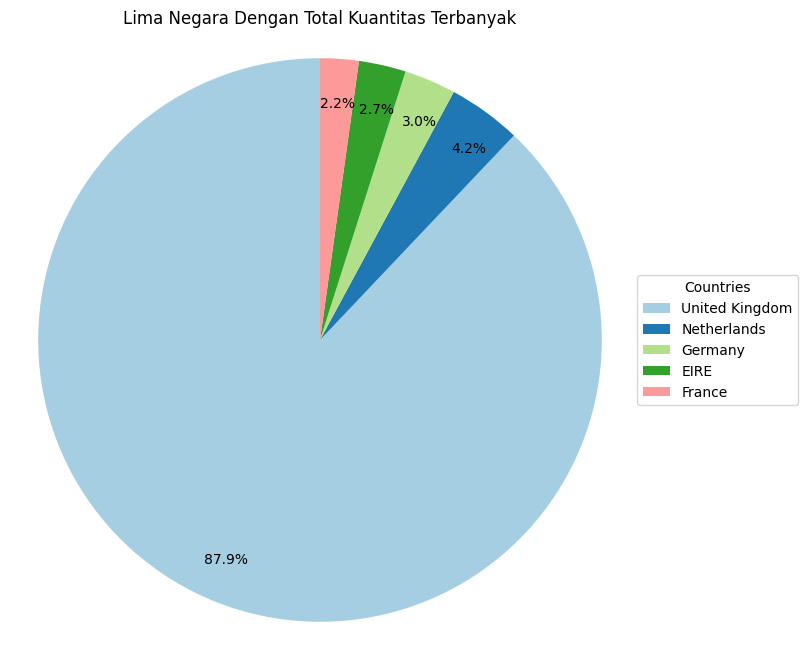

In [ ]:
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(top5_countries['Quantity'],
                                    labels=None,
                                    startangle=90,
                                    colors=plt.cm.Paired(range(5)),
                                    autopct='%1.1f%%')
for i, a in enumerate(autotexts):
    a.set_color('black')
    a.set_position((a.get_position()[0] * 1.5, a.get_position()[1] * 1.4))
plt.legend(wedges, top5_countries['Country'], title="Countries", loc="center left", bbox_to_anchor=(1, 0, 0.2, 1))
plt.title('Lima Negara Dengan Total Kuantitas Terbanyak')
plt.axis('equal')
plt.show()

#### Observation & Insight

- Alasan hanya lima negara yang ditampilkan agar terlihat gambaran besarnya negara mana yang memiliki total kuantitas terbanyak, dan supaya visualisasinya lebih bagus serta informatif.
- Dari Pie Chart ini terlihat bahwa hampir 87.9% produk terjual di UK dan hal ini berbanding lurus dengan total penjualan terbanyak yang berada di UK juga.
- Ini memperkuat argumen saya bahwa pusat dari perusahaan ini berada di UK tetapi melayani *International Shipment* karena penjualan di negara lain tidak ada yang sampai 10% yang mana jumlah ini ini tidak terlalu masuk akal jika perusahaan ini punya cabang di setiap negara. Namun data yang ada tidak cukup untuk membuktikan bahwa argumen ini benar.


# 3. Lakukan analisa multivariate pada kolom numerikal berupa :
- Pairplot + insight / observation **(5 poin)**
- Correlation Heatmap + insight / observation **(5 poin)**

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPenjualan', 'MonthofSales'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   InvoiceNo       4870 non-null   int64         
 1   StockCode       4870 non-null   object        
 2   Description     4870 non-null   object        
 3   Quantity        4870 non-null   float64       
 4   InvoiceDate     4870 non-null   datetime64[ns]
 5   UnitPrice       4870 non-null   float64       
 6   CustomerID      4870 non-null   int64         
 7   Country         4870 non-null   object        
 8   TotalPenjualan  4144 non-null   float64       
 9   MonthofSales    4870 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 347.7+ KB


In [ ]:
categoricals = ['Country', 'MonthofSales']
numericals = ['Quantity', 'UnitPrice', 'TotalPenjualan']

In [ ]:
df[numericals].describe()

Quantity    UnitPrice  TotalPenjualan
count  4870.000000  4870.000000     4144.000000
mean     12.945791     2.937057       12.609464
std      38.145988     4.744515       13.022777
min       1.000000     0.040000        0.120000
25%       2.000000     1.250000        3.750000
50%       5.000000     1.950000       10.000000
75%      12.000000     3.750000       17.400000
max     992.000000   145.000000      142.800000

In [ ]:
df[categoricals].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country       4870 non-null   object  
 1   MonthofSales  4870 non-null   category
dtypes: category(1), object(1)
memory usage: 43.3+ KB


### Pairplot

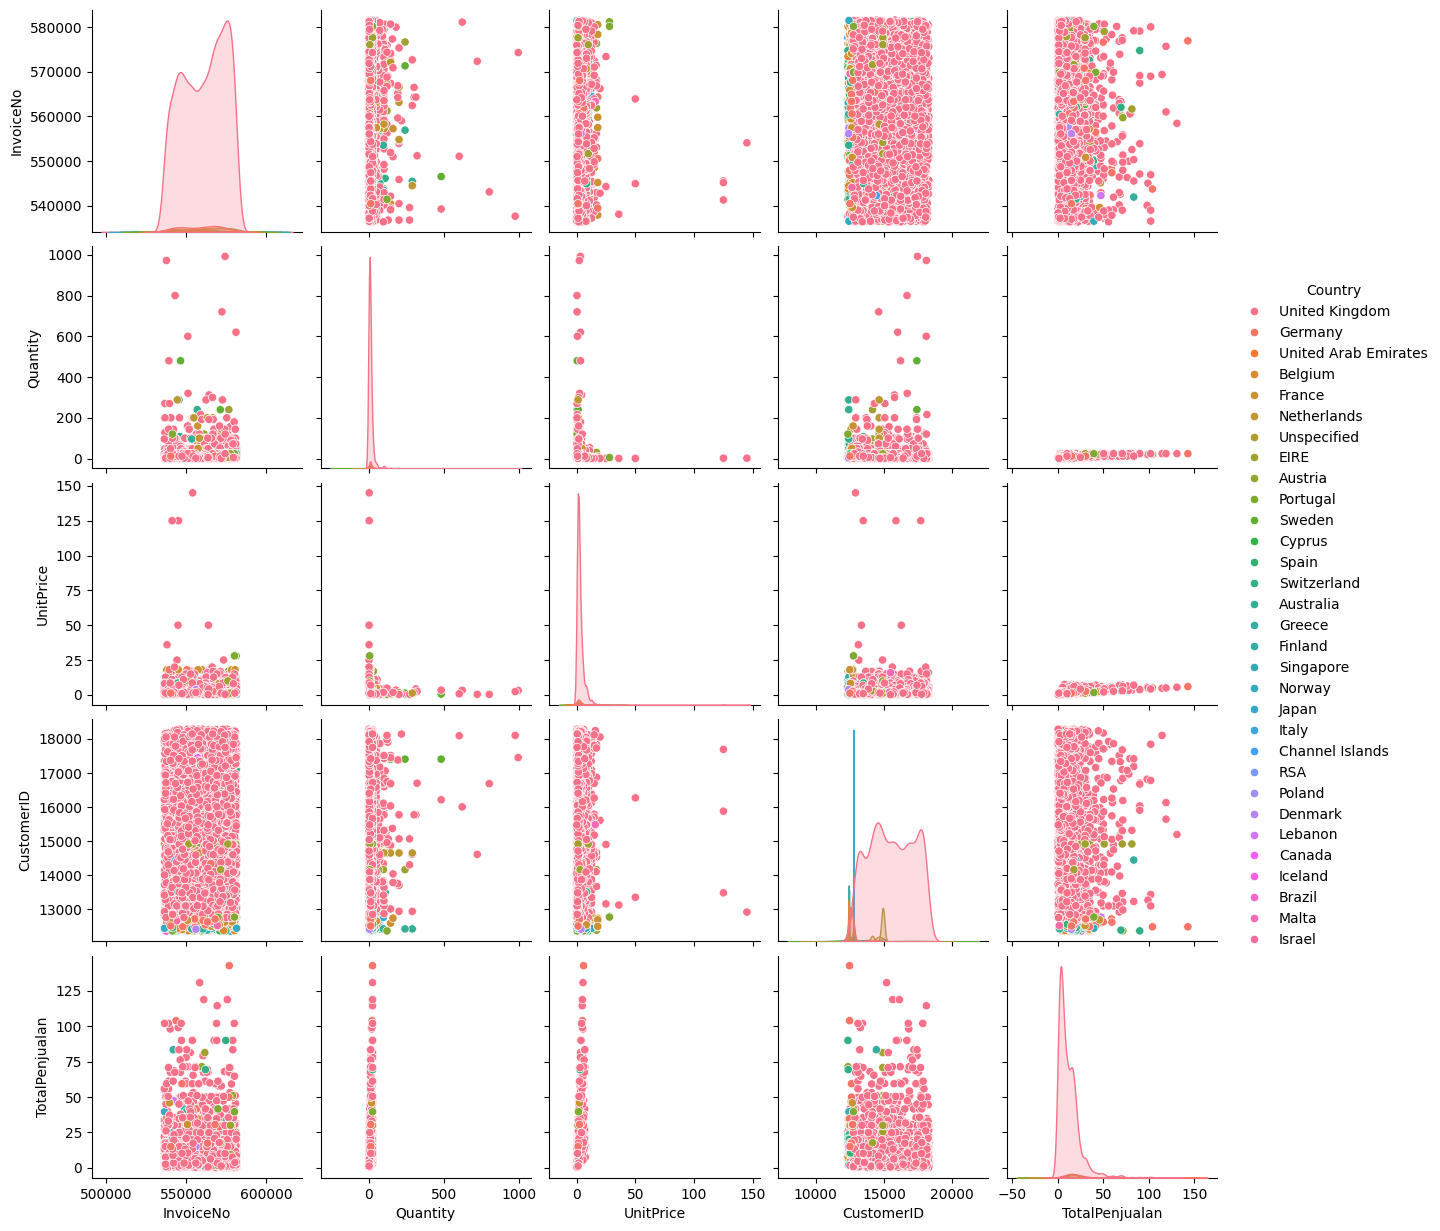

In [ ]:
sns.pairplot(df, hue='Country')


#### Observation & Insight
- Dominasi titik berwarna merah menunjukkan bahwa penjualan terpusat di UK
- Beberapa titik terpisah jauh dari kumpulan titik lainnya mengindikasikan adanya outlier

# Heatmap

<Axes: >

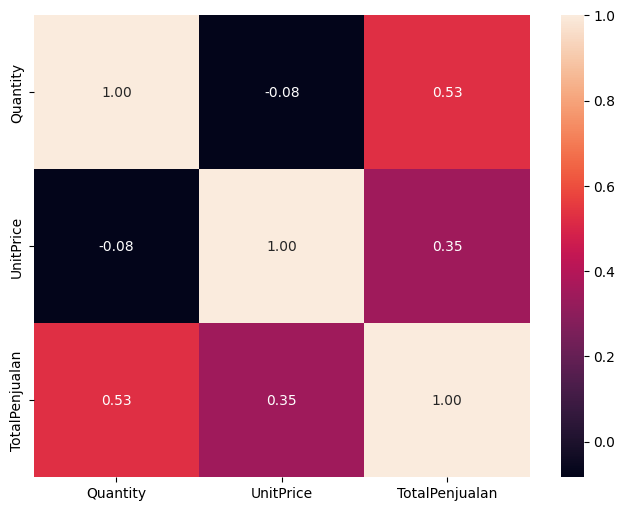

In [ ]:
plt.figure(figsize=(8,6))
correlation = df[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

#### Observation & Insight

- Quantity & Totalpenjualan = Memiliki korelasi sebesar 0.53, artinya ada korelasi positif yakni semakin banyak quantitas penjualan maka semakin banyak pula Total penjualannya. Namun hubungan keduanya medium/tidak terlalu kuat.
- Quantity & UnitPrice = Memiliki korelasi sebesar -0.08, artinya ada indikasi korelasi negatif tetapi sangat lemah. Bisa juga diartikan beberapa produk akan cenderung banyak dibeli saat harga per unitnya murah.
- UnitPrice & TotalPenjualan = Memiliki korelasi sebesar 0.35, artinya ada indikasi korelasi positif tetapi tidak sekuat korelasi antara Quantity & TotalPenjualan.